In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import STAGATE
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from tqdm import tqdm

In [2]:
data_root = Path('../data/BaristaSeq/')

proj_list = [
    'Slice_1_removed.h5ad', 'Slice_2_removed.h5ad', 'Slice_3_removed.h5ad'
]

In [3]:
for proj_name in tqdm(proj_list):
    adata_tmp = sc.read(data_root / proj_name)
    adata_tmp.var_names_make_unique()

    adata_tmp.obs['batch_name'] = proj_name
    
    if proj_name == proj_list[0]:
        adata = adata_tmp
        name = proj_name
        adata.obs['proj_name'] = proj_name
    else:
        var_names = adata.var_names.intersection(adata_tmp.var_names)
        adata = adata[:, var_names]
        adata_tmp = adata_tmp[:, var_names]
        adata_tmp.obs['proj_name'] = proj_name
    
        adata = adata.concatenate(adata_tmp)
        name = name + '_' + proj_name

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  8.34it/s]


------Calculating spatial graph...
The graph contains 2001314 edges, 5257 cells.
380.6951 neighbors per cell on average.


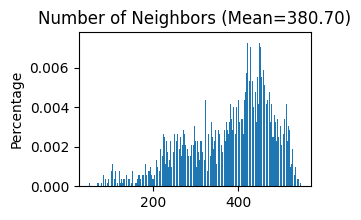

In [4]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)

In [5]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (5257, 79)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2025-03-20 13:52:06.649550: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2025-03-20 13:52:06.977648: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2025-03-20 13:52:06.993959: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d84bf55630 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-03-20 13:52:07.005524: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-03-20 13:52:07.034464: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-03-20 13:52:07.400023: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55d84c9bff10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-20 13:52:07.400103: I

In [6]:
# output_dir1 = ('./feature')
# if not os.path.exists(output_dir1):
#     os.makedirs(output_dir1)
# output_path = os.path.join(output_dir1, f"batch.h5ad")
# adata.write_h5ad(output_path)